# Source Detection and Fit

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib notebook 
import numpy as np
import pandas as pd

from sitelle.constants import FITS_DIR
from sitelle.process import SpectralCubePatch as SpectralCube

from orb.utils import io

from sitelle.fit import fit_SN2
from sitelle.plot import plot_map, plot_scatter, plot_spectra
from sitelle.source import extract_point_source, get_sources

SN2_ORCS = SpectralCube(FITS_DIR/'orig/M31_SN2.merged.cm1.1.0.hdf5')
SN2_ORCS.set_wcs(FITS_DIR/'M31_SN2.1.0.ORCS/M31_SN2.1.0.wcs.deep_frame.fits')
SN2_ORCS.set_dxdymaps(FITS_DIR/'M31_SN2.1.0.ORCS/M31_SN2.1.0.wcs.dxmap.fits',
                      FITS_DIR/'M31_SN2.1.0.ORCS/M31_SN2.1.0.wcs.dymap.fits')
SN2_ORCS.correct_wavelength(FITS_DIR/'M31_SN2.1.0.ORCS/M31_SN2.1.0.skymap.fits')

/usr/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
INFO| Data shape : (2048, 2064, 556)
WARNING| /Users/Barth/Documents/M31/orcs/orcs/core.py:1596: UserWarning: Malformed spectral cube. The number of steps in the header (900) does not correspond to the real size of the data cube (556)
  warnings.warn('Malformed spectral cube. The number of steps in the header ({}) does not correspond to the real size of the data cube ({})'.format(step_nb, self.dimz))

INFO| Cube is in WAVENUMBER (cm-1)
INFO| Cube is CALIBRATED in wavenumber
WARNING| /Users/Barth/Documents/M31/orb/orb/core.py:416: UserWarning: Parameter already defined
  warnings.warn('Parameter already defined')

INFO| Cube is in WAVENUMBER (cm-1)
INFO| Cube is CALIBRATED in wavenumber
W

In [2]:
# We load and look at the detection frame
SN2_detection_frame = io.read_fits(FITS_DIR/'SN2/detection_frame.fits')

In [3]:
snr_threshold = 8 # Fixed signal-to-noise ratio threshold
SN2_sources = get_sources(SN2_detection_frame, 
                          threshold=snr_threshold,
                          mode='SEGM')

SN2_sources

INFO| Detecting
WARNING| /usr/local/lib/python2.7/site-packages/photutils/segmentation/detect.py:123: RuntimeWarning: invalid value encountered in greater
  check_normalization=True) > threshold)

INFO| Deblending
INFO| Retieving properties
INFO| Filtering Quantity columns


,id,xcentroid,ycentroid,sky_centroid,sky_centroid_icrs,source_sum,source_sum_err,background_sum,background_mean,background_at_centroid,...,eccentricity,orientation,ellipticity,elongation,covar_sigx2,covar_sigxy,covar_sigy2,cxx,cxy,cyy
0,1,1799.015929,55.714739,None,None,71.180574,None,None,None,None,...,0.792046,-1.155019,0.389539,1.638106,0.475824,-0.232195,0.899208,2.404618,1.241849,1.272426
1,2,1993.039044,63.526273,None,None,1125.244804,None,None,None,None,...,0.779919,-0.816430,0.374119,1.597748,3.966933,-1.778681,4.187997,0.311380,0.264492,0.294944
2,3,1523.544932,64.680744,None,None,207.789919,None,None,None,None,...,0.784809,-1.186372,0.380262,1.613586,0.891429,-0.405525,1.729777,1.255715,0.588773,0.647124
3,4,1128.344588,74.832441,None,None,182.670688,None,None,None,None,...,0.663103,1.474573,0.251472,1.335956,0.840420,0.062619,1.483131,1.193637,-0.100792,0.676377
4,5,380.656979,96.441849,None,None,1505.593478,None,None,None,None,...,0.810000,1.006158,0.413570,1.705233,3.270872,1.824305,4.995344,0.383931,-0.280424,0.251392
5,6,1725.319049,137.258052,None,None,533.696530,None,None,None,None,...,0.713386,-1.023478,0.299229,1.426999,1.845152,-0.663517,2.529558,0.598406,0.313930,0.436499
6,7,1728.159251,183.295429,None,None,68.944996,None,None,None,None,...,0.719897,-0.519687,0.305919,1.440754,0.651145,-0.166774,0.455075,1.694840,1.242238,2.425064
7,8,973.679613,199.060425,None,None,1606.124847,None,None,None,None,...,0.712291,1.404945,0.298116,1.424736,2.245869,0.366329,4.373040,0.451430,-0.075633,0.231842
8,9,881.669442,203.291408,None,None,198.724241,None,None,None,None,...,0.753854,1.247243,0.342958,1.521973,0.810944,0.284004,1.562628,1.316956,-0.478707,0.683450
9,10,1505.959018,205.014543,None,None,468.669756,None,None,None,None,...,0.744913,-1.205079,0.332839,1.498888,1.308970,-0.470044,2.356416,0.822904,0.328296,0.457117


<IPython.core.display.Javascript object>


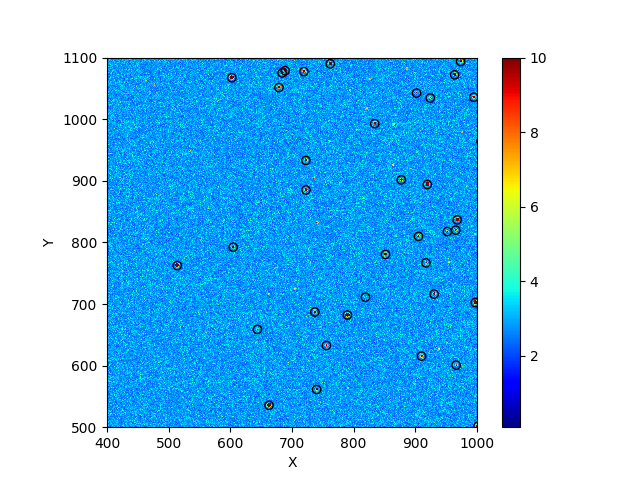

(500, 1100)

In [4]:
SN2_sources.rename(columns={'ycentroid':'xcentroid', 'xcentroid':'ycentroid'}, inplace=True)

f,ax = plot_map(SN2_detection_frame, cmap='jet', colorbar=True, vmax=10.)
plot_scatter(SN2_sources['xcentroid'], SN2_sources['ycentroid'], ax=ax, c='k', marker='o', facecolors='none')

ax.set_xlim(400,1000)
ax.set_ylim(500,1100)

In [5]:
### Filtering out of bounds detections
from sitelle.calibration import filter_star_list
source_list = filter_star_list(SN2_sources.as_matrix(['xcentroid', 'ycentroid']))
SN2_sources['xcentroid'] = source_list[:,0]
SN2_sources['ycentroid'] = source_list[:,1]

### Dropping null rows, i.e. bad detections
for colname in SN2_sources.columns:
    if pd.isnull(SN2_sources[colname]).all():
        SN2_sources.drop(colname, axis=1, inplace=True)
SN2_sources.dropna(inplace=True)

### Rounding positionss for spectra extraction
SN2_sources['xpos'] = SN2_sources['xcentroid'].apply(lambda x: int(round(x)))
SN2_sources['ypos'] = SN2_sources['ycentroid'].apply(lambda y: int(round(y)))

### Sorting detections on the brightness
SN2_sources.sort_values('source_sum', ascending=False, inplace=True)
SN2_sources.reset_index(drop=True, inplace=True)

## Computing physical positions
radec = SN2_ORCS.pix2world(SN2_sources.as_matrix(['xcentroid', 'ycentroid']))
SN2_sources['ra'] = radec[:,0]
SN2_sources['dec'] = radec[:,1]

In [24]:
source = SN2_sources.iloc[1]
fit_res, fit_params = fit_SN2(source, SN2_ORCS, return_fit_params=True)

<IPython.core.display.Javascript object>


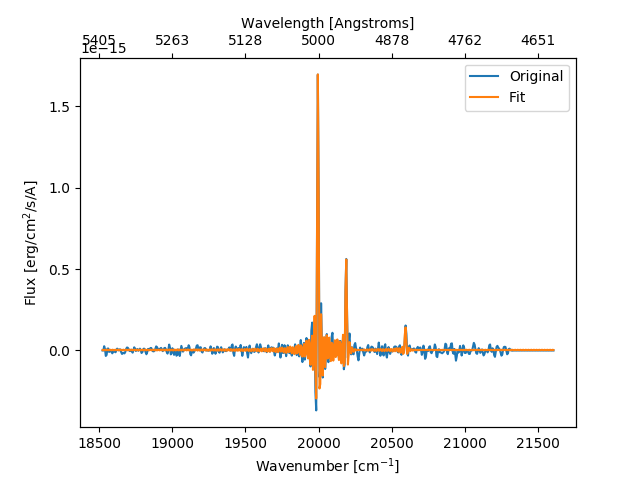

(<Figure size 640x480 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11f07b750>)

In [25]:
# We display the original spectra and the fit
x,y = source[['xpos', 'ypos']].astype(int)

axis, spectra = extract_point_source(x,y, SN2_ORCS)
fitted_spectra = fit_params['fitted_vector']
f,ax = plot_spectra(axis,spectra, label='Original')
plot_spectra(axis, fitted_spectra, ax=ax, label='Fit')

In [26]:
## We append the fit result to the original source data
source = source.append(fit_res)

## We define some threshold to say if a line is detected or not
from sitelle.constants import SN2_LINES
snr_lim = 5
for line_name in SN2_LINES:
    line_name = line_name.lower().replace('[', '').replace(']', '')
    source['%s_detected'%line_name] = source['snr_%s'%line_name] > snr_lim
    source['flux_%s'%line_name] = np.where(source['%s_detected'%line_name],
                                            source['flux_%s'%line_name],
                                            snr_lim*source['flux_%s_err'%line_name])

<IPython.core.display.Javascript object>


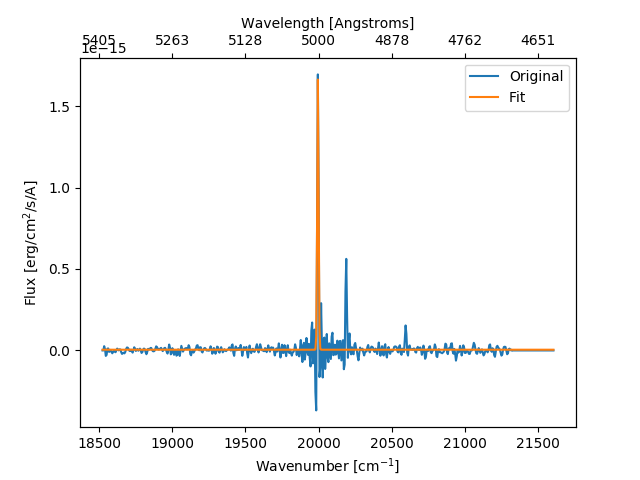

(<Figure size 640x480 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x112b289d0>)

In [9]:
## An example of tweaking the keywords 
## We only fit the 0III5007 line with a gaussian 
kwargs_spec = {'fmodel':'gaussian'}
fit_res, fit_params = fit_SN2(source, SN2_ORCS, return_fit_params=True,
                             lines=['[OIII]5007'], kwargs_spec=kwargs_spec)

fitted_spectra = fit_params['fitted_vector']
f,ax = plot_spectra(axis,spectra, label='Original')
plot_spectra(axis, fitted_spectra, ax=ax, label='Fit')

<IPython.core.display.Javascript object>


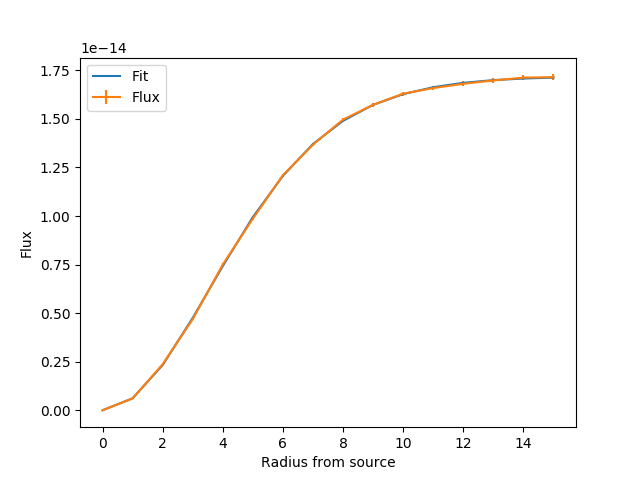

<IPython.core.display.Javascript object>


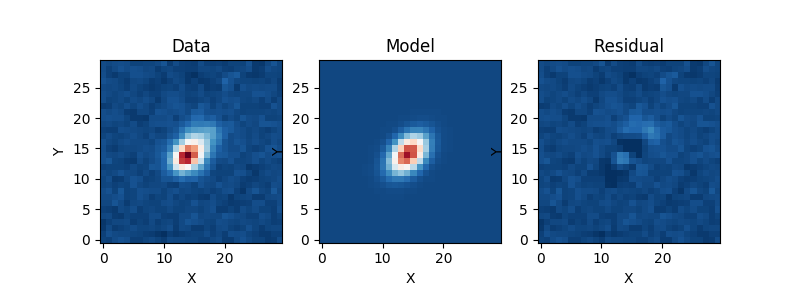

erf_amplitude                                                   1.71839e-14
erf_amplitude_err                                               7.86383e-17
erf_fwhm                                                            4.44762
erf_ks_pvalue                                                      0.717872
erf_xfwhm                                                           2.98996
erf_yfwhm                                                           1.99384
flux_err_r                [7.247704606718017e-18, 1.5121543475326628e-17...
flux_fraction_3                                                    0.273046
flux_map_ks_pvalue                                              8.70415e-14
flux_r                    [0.0, 6.071588579643632e-16, 2.370023932326401...
model_flux_fraction_15                                             0.996758
modeled_flux_r            [-9.719107571595448e-19, 6.153336475257311e-16...
psf_amplitude                                                     1.605e-14
psf_ks_pvalu

In [33]:
analysis = analyse_source(source, SN2_ORCS, plot=True)
print analysis

In [34]:
source = source.append(analysis)

In [ ]:
from sitelle.parallel import parallel_apply_over_df

v_min = -1200.
v_max = 300.
SN2_ORCS.inputparams = {}
# kwargs_spec = {'fmodel':'sincgauss', 'sigma_def':['1'], 'sigma_cov':20}
kwargs_spec = {}
fit_dataframe = parallel_apply_over_df(SN2_sources, fit_SN2, axis=1, args=(SN2_ORCS, ), v_min = v_min, v_max = v_max, kwargs_spec = kwargs_spec,modules = 'from sitelle.region import centered_square_region','from sitelle.fit import guess_source_velocity, refine_velocity_guess', 'from sitelle.utils import stats_without_lines','from orcs.utils import fit_lines_in_spectrum')

In [ ]:
## We merge it with the original parameters, and evaluate detections
SN2_fit_res = pd.merge(SN2_sources, fit_dataframe, left_index=True, right_index=True)
snr_lim = 3.

for line_name in SN2_LINES:
    line_name = line_name.lower().replace('[', '').replace(']', '')
    SN2_fit_res['%s_detected'%line_name] = SN2_fit_res['snr_%s'%line_name] > snr_lim
    SN2_fit_res['flux_%s'%line_name] = np.where(SN2_fit_res['%s_detected'%line_name],
                                            SN2_fit_res['flux_%s'%line_name],
                                            snr_lim*SN2_fit_res['flux_%s_err'%line_name])

In [ ]:
analysis = parallel_apply_over_df(SN2_sources, analyse_source, axis=1, args=(SN2_ORCS,))